In [3]:
import pandas as pd
import glob
import numpy as np
from multiprocessing import Pool
from multiprocessing import cpu_count
num_partitions = cpu_count()

In [4]:
super_frame = pd.read_csv('df_resolute.csv', keep_default_na=False)
# convert to datetime object
super_frame['ModifiedOn'] = pd.to_datetime(super_frame['ModifiedOn'])

In [10]:
super_frame.head()

,Neighbourhood,Area_sqm,PropertyType,Bedrooms,Bathrooms,Rooms,Floor,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude,ConstructionYear,ModifiedOn
0,Cyclades Paros,80,Maisonette,3,0,0,2,0,155000,1938,0.000000,0.000000,Under construction,2019-04-24
1,Corinthia Vocha,154,Store,0,0,1,Ground floor,0,180000,1169,0.000000,0.000000,1960,2018-11-16
2,Athens - South Nea Smyrni,60,Office,0,0,0,2,0,63000,1050,0.000000,0.000000,1993,2019-04-24
3,Thessaloniki - Suburbs Thermi,1850,Business building,0,0,0,Ground floor,3,1650000,892,40.515778,22.991291,2002,2019-04-24
4,Kavala Prefecture Thasos,5000,Parcel,0,0,0,,0,75000,15,40.693836,24.556259,,2019-04-30


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe37296ba58>]],
      dtype=object)

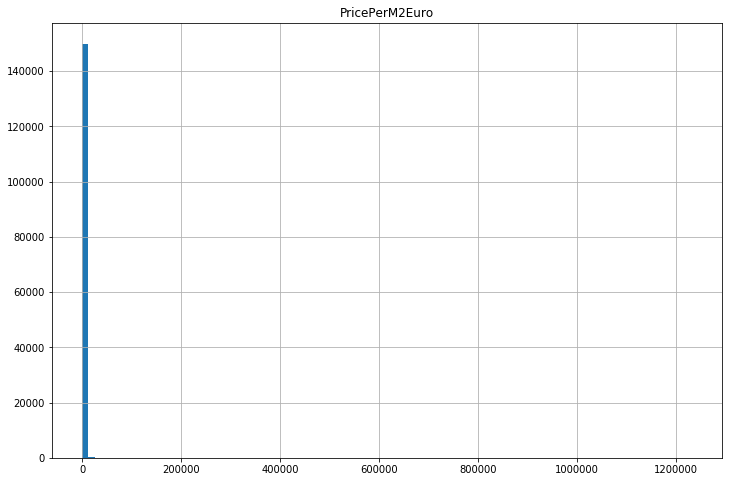

In [9]:
super_frame.query("PriceEuro>10").hist(column='PricePerM2Euro',bins=100,figsize=(12,8))

In [47]:
# should we create a year range? 70s, 80s, 90s, 00s, 10s, 20s ? 
super_frame.ConstructionYear.value_counts(sort=True).head()

                      57471
2010                   5550
Under construction     5496
-                      4241
1980                   4005
Name: ConstructionYear, dtype: int64

## Describe 

In [11]:
super_frame.corr()

,Area_sqm,Bedrooms,Bathrooms,Rooms,Levels,PriceEuro,PricePerM2Euro,Latitude,Longitude
Area_sqm,1.000000,-0.009783,-0.001648,-0.000996,-0.006936,0.350536,-0.004297,0.001914,0.001527
Bedrooms,-0.009783,1.000000,0.102472,-0.062667,0.283708,0.026600,0.086560,0.033936,0.036869
Bathrooms,-0.001648,0.102472,1.000000,0.491379,0.060683,0.061293,0.017872,0.006979,0.006941
Rooms,-0.000996,-0.062667,0.491379,1.000000,0.088593,0.302590,0.027239,-0.012685,-0.011190
Levels,-0.006936,0.283708,0.060683,0.088593,1.000000,0.112683,0.058374,-0.007105,-0.000622
PriceEuro,0.350536,0.026600,0.061293,0.302590,0.112683,1.000000,0.167678,-0.036559,-0.028913
PricePerM2Euro,-0.004297,0.086560,0.017872,0.027239,0.058374,0.167678,1.000000,-0.005236,-0.001366
Latitude,0.001914,0.033936,0.006979,-0.012685,-0.007105,-0.036559,-0.005236,1.000000,0.979605
Longitude,0.001527,0.036869,0.006941,-0.011190,-0.000622,-0.028913,-0.001366,0.979605,1.000000


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Matrix Heatmap
corrmat = super_frame.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

ModuleNotFoundError: No module named 'seaborn'

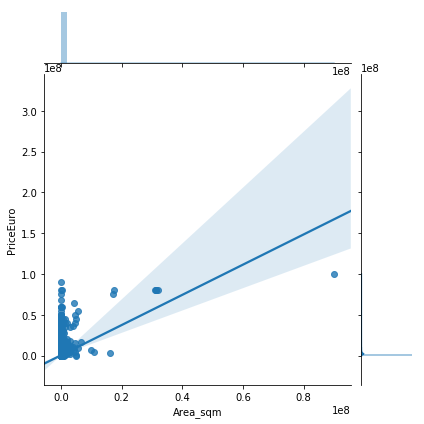

In [26]:
# Living Area vs Sale Price
sns.jointplot(x=super_frame['Area_sqm'], y=super_frame['PriceEuro'], kind='reg')

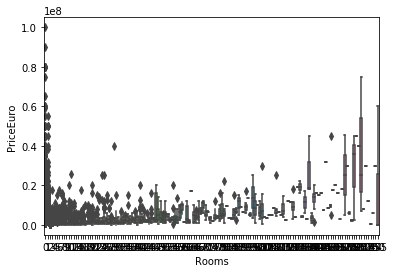

In [25]:
# Garage Area vs Sale Price
sns.boxplot(x=super_frame['Rooms'], y=super_frame['PriceEuro'])

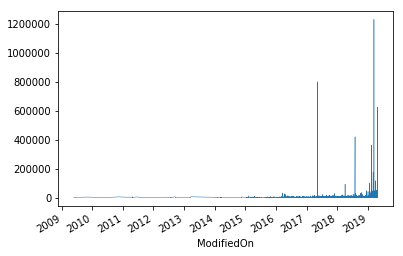

In [67]:
super_frame_lol['PricePerM2Euro'].plot(linewidth=0.5);